# This file defines functions for filtering:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import warnings
import gc
from scipy import signal
warnings.filterwarnings("ignore")

In [4]:
def butter_filt(signal,order=2, cutofffrq=60, samplingfrq=25000, filtertype="bandpass"):
    if filtertype == "low":
        normal_cutoff = cutofffrq/(0.5*samplingfrq)
        fltr = scipy.signal.butter(order, normal_cutoff,filtertype,output = "sos")
    elif filtertype == "high":
        normal_cutoff = cutofffrq/(0.5*samplingfrq)
        fltr = scipy.signal.butter(order, normal_cutoff,filtertype,output = "sos")
    elif filtertype == "bandpass":
        if cutofffrq.size == 2:
            normal_cutoff = cutofffrq/(0.5*samplingfrq)
            fltr = scipy.signal.butter(order, normal_cutoff,filtertype,output = "sos")
        else:
            print("Need two inputs for bandpass and bandstop")
    elif filtertype == "bandstop":
        if cutofffrq.size == 2:
            normal_cutoff = cutofffrq/(0.5*samplingfrq)
            fltr = scipy.signal.butter(order, normal_cutoff,filtertype,output = "sos")
        else:
            raise  ValueError("Need two inputs for bandpass and bandstop")
    
    else: 
        print("Incorrect filter type: high, low, bandpass, bandstop")
    
    
   
    fltrsig = scipy.signal.sosfilt(fltr,signal)
    return fltrsig

### Testing

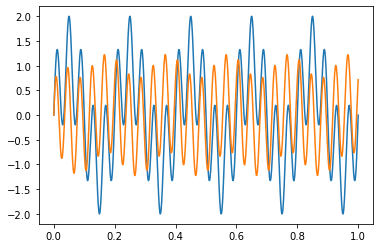

In [6]:
t = np.linspace(0,1,1000)
sinwave = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*25*t)
samplingfrq = 1000
plt.plot(t,sinwave)
lpcutoff = 10
filtsig = butter_filt(sinwave,2,lpcutoff,samplingfrq,"low")
#plt.plot(t,filtsig)
hpcutoff = 10
filtsig = butter_filt(sinwave,2,hpcutoff,samplingfrq,"high")
plt.plot(t,filtsig)

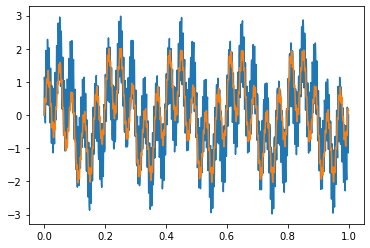

In [11]:
noise = np.sin(2*np.pi*200*t)
sinnoisy = sinwave + noise

#lets filter out the noise using a bandstop
cutofffrq = np.array([2,100])
filtsig = butter_filt(sinnoisy,2,cutofffrq,samplingfrq,"bandpass")
plt.plot(t,sinnoisy)
plt.plot(t,filtsig)


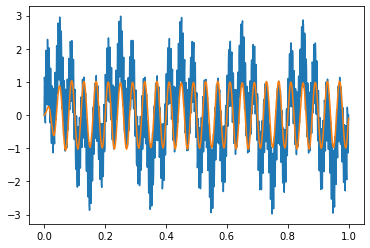

In [13]:
#lets isolate 25 hz using a bandpass
cutofffrq = np.array([17,35])
filtsig = butter_filt(sinnoisy,2,cutofffrq,samplingfrq,"bandpass")
plt.plot(t,sinnoisy)
plt.plot(t,filtsig)

(-70.0, 70.0)

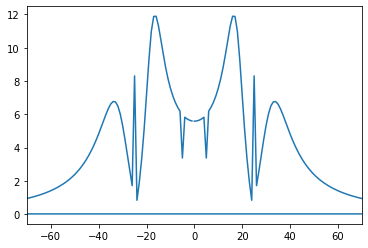

In [14]:
from scipy.fft import fft, fftfreq, fftshift
freq = np.array(fftfreq(t.size, 1/samplingfrq))
spect1 = np.array(fft(filtsig))
plt.plot(freq,np.abs(np.real(spect1)))
plt.xlim([-70,70])